In [22]:
# This program is to implement CNN model to recognise handwriting images to be number 0-9.
# https://www.tensorflow.org/tutorials/estimators/cnn#building_the_cnn_mnist_classifier

from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.INFO)

In [ ]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
  }
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [ ]:
# Train image data
((train_data, train_labels),
 (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_data = train_data/np.float32(255)

In [ ]:
eval_data = eval_data/np.float32(255)

In [ ]:
train_labels = train_labels.astype(np.int32)  # not required

In [ ]:
eval_labels = eval_labels.astype(np.int32)  # not required

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

In [ ]:
# Create the Estimator
mnist_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="/tensorflow/mnist_convnet_model")

In [ ]:
# Setup Logging Hook
# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}


In [ ]:
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

In [ ]:
# Train CNN Model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)


In [15]:
# trail train model with 1 step
# get cuDNN failed from python log
# conda list | findstr cudnn (using version 7.3.1)
# conda uninstall cudnn
# install cudnn 7.5.1 manually
mnist_classifier.train(
    input_fn=train_input_fn,
    steps=1,
    hooks=[logging_hook])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tensorflow/mnist_convnet_model\model.ckpt-0
Instructions for updatin

INFO:tensorflow:loss = 2.2898643, step = 0
INFO:tensorflow:Saving checkpoints for 1 into /tensorflow/mnist_convnet_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.2898643.


In [16]:
# Train model with 1000 steps
mnist_classifier.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tensorflow/mnist_convnet_model\model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tensorflow/mnist_convnet_model\model.ckpt.
INFO:tensorflow:loss = 2.2968087, step = 1
INFO:tensorflow:global_step/sec: 38.7505
INFO:tensorflow:loss = 2.2908437, step = 101 (2.584 sec)
INFO:tensorflow:global_step/sec: 40.5105
INFO:tensorflow:loss = 2.2631054, step = 201 (2.470 sec)
INFO:tensorflow:global_step/sec: 40.8284
INFO:tensorflow:loss = 2.2461069, step = 301 (2.448 sec)
INFO:tensorflow:global_step/sec: 40.7807
INFO:tensorflow:loss = 2.2203684, step = 401 (2.453 sec)
INFO:tensorflow:global_step/sec: 38.2782
INFO:tensorflow:loss = 2.2098625, step = 501 (2.613 sec)
INFO:tensorflow:global_step/sec: 39.673
INFO:tensorfl

In [17]:
# Evaluate the model with test data
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)

In [18]:
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-13T07:48:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tensorflow/mnist_convnet_model\model.ckpt-1001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-13-07:48:29
INFO:tensorflow:Saving dict for global step 1001: accuracy = 0.7154, global_step = 1001, loss = 1.9056551
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1001: /tensorflow/mnist_convnet_model\model.ckpt-1001


In [19]:
print(eval_results)

{'accuracy': 0.7154, 'loss': 1.9056551, 'global_step': 1001}


In [20]:
eval_labels[0]

7

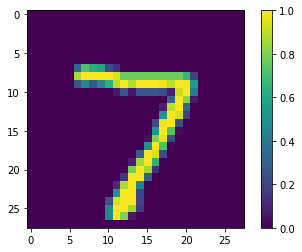

In [23]:
# PLot the 1st image of test of train data
plt.figure()
plt.imshow(eval_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

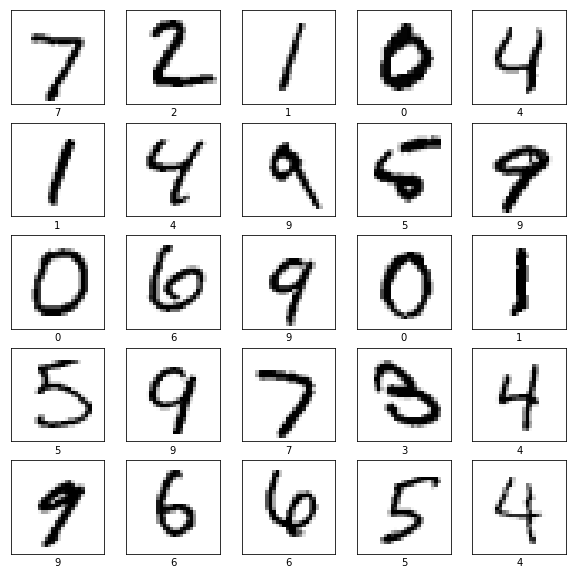

In [26]:
# Display the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(eval_data[i], cmap=plt.cm.binary)
    plt.xlabel(eval_labels[i])
plt.show()